In [92]:
import os
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
%matplotlib inline

in_dir = 'D:\\Toppan\\2017-11-20 全データ\\処理済(総量)\\vectorized_keikaku_shibata'
files = [f for f in os.listdir(in_dir)]

# train and test data
#train_month_file, test_month_file = '201801010800.xlsx', '201802010800.xlsx'
train_month_file, test_month_file = '201701010800.xlsx', '201702010800.xlsx'

In [93]:
def pred_energy(energy, train_month_file, test_month_file):

    train_df = pd.read_excel(os.path.join(in_dir, train_month_file), sheet_name=energy).values
    test_df = pd.read_excel(os.path.join(in_dir, test_month_file), sheet_name=energy).values
    
    #dtr = DecisionTreeRegressor()
    dtr = RandomForestRegressor(n_estimators=1000)
    #dtr = GradientBoostingRegressor(n_estimators=1000)
    dtr.fit(train_df[:, :-1], train_df[:, -1])
    
    
    pred_dtr = []
    for test_x in test_df[:, :-1]:
        pred_dtr.append(dtr.predict(test_x.reshape(1, -1))[0])

    plt.figure(figsize=(20, 8))

    plt.plot(pred_dtr, label='pred')
    plt.plot(test_df[:, -1], label='true')
    
    plt.plot(pred_dtr - test_df[:, -1].ravel(), label='diff')
    
    print('mse: ', mean_squared_error(pred_dtr, test_df[:, -1]))
    
    plt.legend()

In [86]:
def pred_energy_2(energy, train_month_file, test_month_file):

    train_df = pd.read_excel(os.path.join(in_dir, train_month_file), sheet_name=energy).values
    test_df = pd.read_excel(os.path.join(in_dir, test_month_file), sheet_name=energy).values

    x_ss, y_ss = StandardScaler(), StandardScaler()
    
    x_train = x_ss.fit_transform(train_df[:, :-1])
    y_train = y_ss.fit_transform(train_df[:, -1].reshape(-1, 1))
    
    dtr = RandomForestRegressor(n_estimators=1000)
    dtr.fit(x_train, y_train)
    
    pred_dtr = []
    for test_x in test_df[:, :-1]:
        test_x = x_ss.transform(test_x.reshape(1, -1))
        pred_y = y_ss.inverse_transform(dtr.predict(test_x.reshape(1, -1)))
        pred_dtr.append(pred_y[0])

    plt.figure(figsize=(20, 8))

    plt.plot(pred_dtr, label='pred')
    plt.plot(test_df[:, -1], label='true')
    
    plt.plot(pred_dtr - test_df[:, -1].ravel(), label='diff')
    
    print('mse: ', mean_squared_error(pred_dtr, test_df[:, -1]))
    
    plt.legend()

mse:  0.014816173825821287


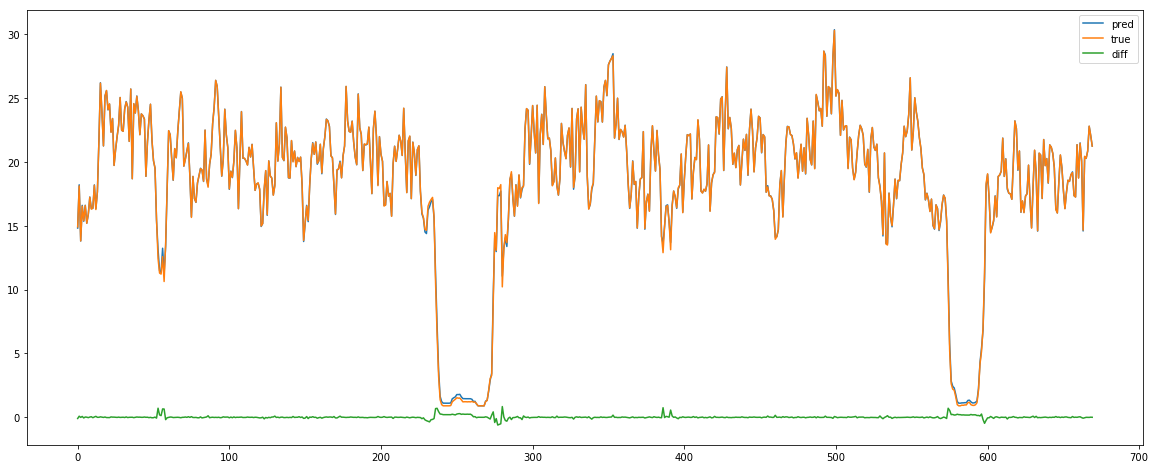

In [87]:
pred_energy('蒸気', train_month_file, test_month_file)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


mse:  0.01434595482804793


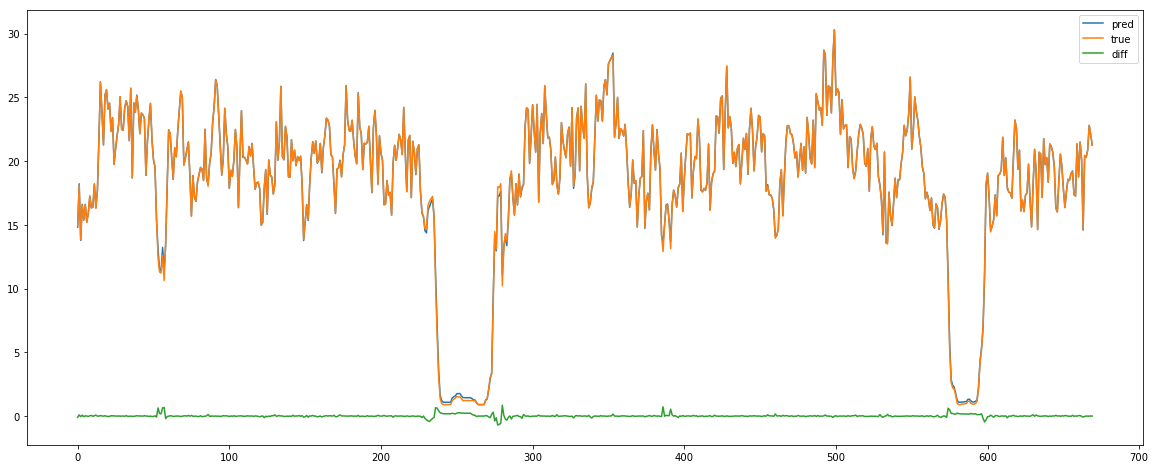

In [88]:
pred_energy_2('蒸気', train_month_file, test_month_file)

mse:  0.08743118208955226


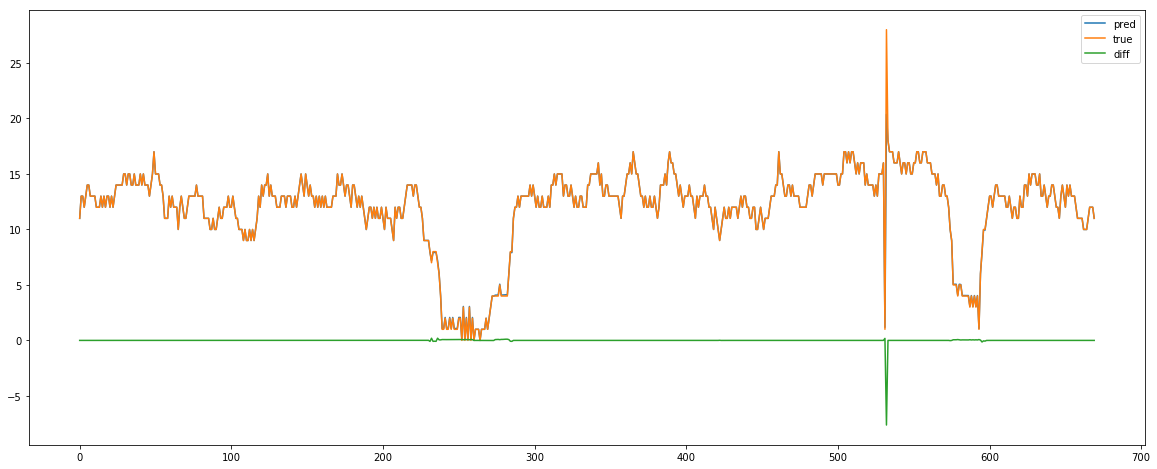

In [89]:
pred_energy('冷水', train_month_file, test_month_file)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


mse:  0.08742064626865659


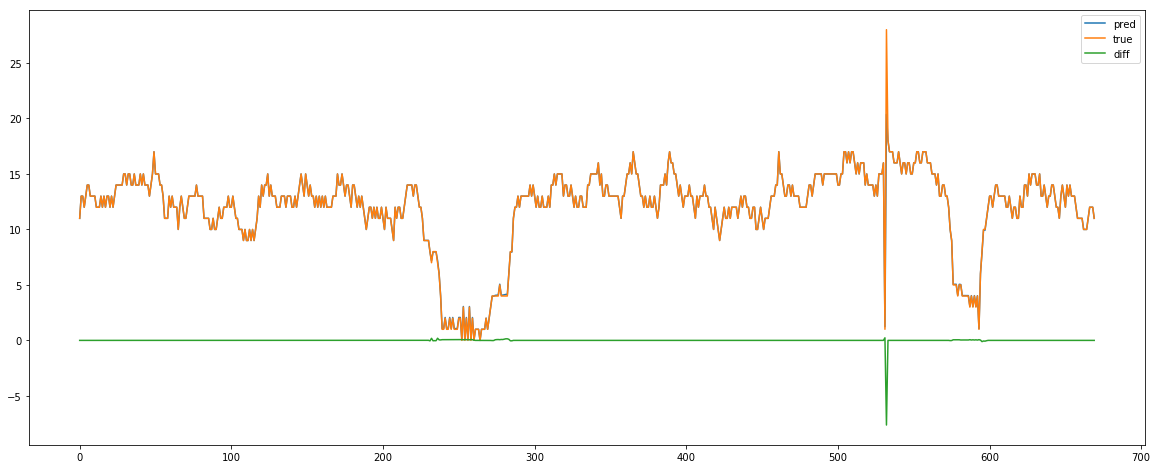

In [90]:
pred_energy_2('冷水', train_month_file, test_month_file)

mse:  814.3533389970153


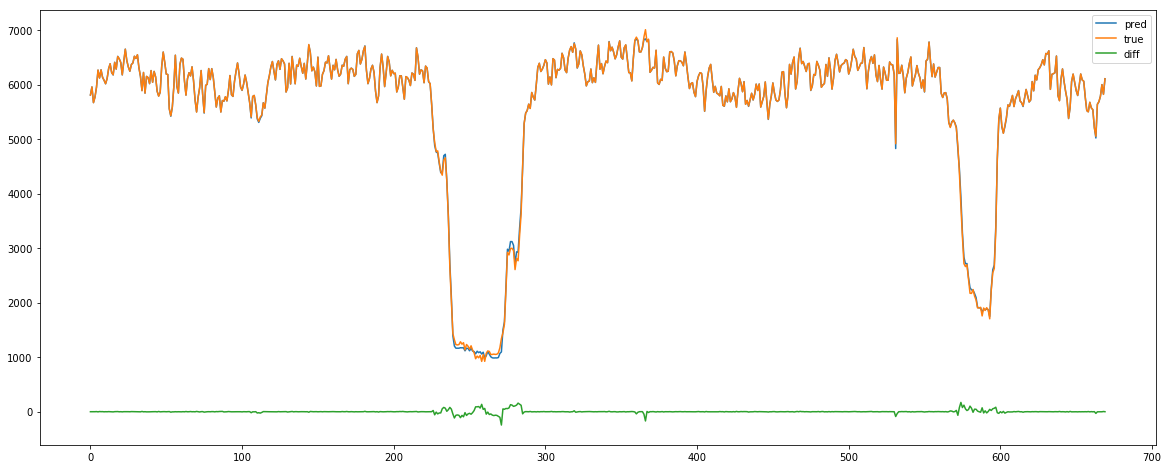

In [91]:
pred_energy('電力', train_month_file, test_month_file)